<a href="https://colab.research.google.com/github/trunfo4608/Python-Analise_Educacional-/blob/main/Proj_Caso_Escola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_dados = pd.read_csv('estudantes.csv')
df_dados.head(n=5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df_dados.shape

(1000, 8)

In [4]:
df_novo = df_dados.rename(
     columns={
              'gender':'Sexo',
              'race/ethnicity':'Raca/Cor',
              'parental level of education':'Nivel de Educacao dos Pais',
              'lunch':'Refeicao',
              'test preparation course':'Preparacao de Prova',
              'math score':'Nota Matematica',
              'reading score':'Nota Leitura',
              'writing score':'Nota Redacao'
            }
)

df_novo

,Sexo,Raca/Cor,Nivel de Educacao dos Pais,Refeicao,Preparacao de Prova,Nota Matematica,Nota Leitura,Nota Redacao
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#df_novo['Sexo'].unique()
#df_novo['Raca/Cor'].unique()
#df_novo['Nivel de Educacao dos Pais'].unique()
#df_novo['Refeicao'].unique()
#df_novo['Preparacao de Prova'].unique()

array(['none', 'completed'], dtype=object)

In [5]:
def mudaNomeSexo(sexo):

  if sexo =='female':
    return 'Feminino'
  else:
    return 'Masculino'


def mudaNomeRaca(raca):
  if raca == 'group A':
    return 'grupo A'
  elif raca == 'group B':
    return 'grupo B'
  elif raca == 'group C':
    return 'grupo C'
  elif raca == 'group D':
    return 'grupo D'
  else:
    return 'grupo E'


def mudaGraduacaoPais(graduacao):
  if graduacao == "bachelor's degree":
     return 'bacharelado'
  elif graduacao =="some college":
    return 'alguma faculdade'
  elif graduacao == "master's degree":
    return 'mestrado'
  elif graduacao == "associate's degree":
    return 'grau de associado'
  elif graduacao == "high school":
    return 'ensino medio'
  else:
    return 'graduação'


def mudaAlimentacaoNome(alimentacao):

  if alimentacao == 'standard':
    return 'padrao'
  else:
    return 'livre/reduzido'


def mudaPreparacaoProvaNome(preparacao):

  if preparacao == 'none':
    return 'sem preparacao'
  else:
    return 'com preparacao'


df_novo['Sexo'] = df_novo['Sexo'].apply(mudaNomeSexo)
df_novo['Raca/Cor'] = df_novo['Raca/Cor'].apply(mudaNomeRaca)
df_novo['Nivel de Educacao dos Pais'] = df_novo['Nivel de Educacao dos Pais'].apply(mudaGraduacaoPais)
df_novo['Refeicao'] = df_novo['Refeicao'].apply(mudaAlimentacaoNome)
df_novo['Preparacao de Prova'] = df_novo['Preparacao de Prova'].apply(mudaPreparacaoProvaNome)



In [6]:
df_novo.head(n=5)

,Sexo,Raca/Cor,Nivel de Educacao dos Pais,Refeicao,Preparacao de Prova,Nota Matematica,Nota Leitura,Nota Redacao
0,Feminino,grupo B,bacharelado,padrao,sem preparacao,72,72,74
1,Feminino,grupo C,alguma faculdade,padrao,com preparacao,69,90,88
2,Feminino,grupo B,mestrado,padrao,sem preparacao,90,95,93
3,Masculino,grupo A,grau de associado,livre/reduzido,sem preparacao,47,57,44
4,Masculino,grupo C,alguma faculdade,padrao,sem preparacao,76,78,75


In [7]:
df_novo.isnull().sum()


,0
Sexo,0
Raca/Cor,0
Nivel de Educacao dos Pais,0
Refeicao,0
Preparacao de Prova,0
Nota Matematica,0
Nota Leitura,0
Nota Redacao,0


In [8]:
df_novo.nunique()


,0
Sexo,2
Raca/Cor,5
Nivel de Educacao dos Pais,6
Refeicao,2
Preparacao de Prova,2
Nota Matematica,81
Nota Leitura,72
Nota Redacao,77


In [ ]:
df_novo.duplicated().sum()


0

In [ ]:
df_novo.describe()

,Nota Matematica,Nota Leitura,Nota Redacao
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sexo                        1000 non-null   object
 1   Raca/Cor                    1000 non-null   object
 2   Nivel de Educacao dos Pais  1000 non-null   object
 3   Refeicao                    1000 non-null   object
 4   Preparacao de Prova         1000 non-null   object
 5   Nota Matematica             1000 non-null   int64 
 6   Nota Leitura                1000 non-null   int64 
 7   Nota Redacao                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df_novo['Sexo'].value_counts(normalize=True) * 100

,proportion
Sexo,
Feminino,51.8
Masculino,48.2


In [ ]:
df_novo.groupby(by=['Sexo']).describe()['Nota Matematica'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,Feminino,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,Masculino,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


Text(0.5, 1.0, 'Nota Matematica por Sexo')

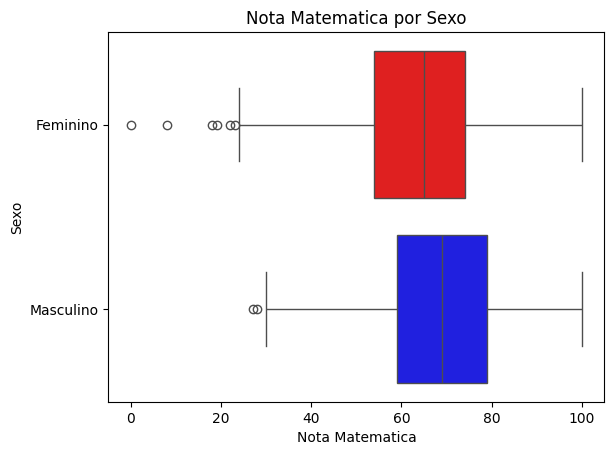

In [ ]:
ax = sns.boxplot(data=df_novo,x='Nota Matematica',y='Sexo',palette=['red','blue'])
ax.set_title('Nota Matematica por Sexo')

In [ ]:
df_novo['Nivel de Educacao dos Pais'].value_counts(normalize = True) * 100

,proportion
Nivel de Educacao dos Pais,
alguma faculdade,22.6
grau de associado,22.2
ensino medio,19.6
graduação,17.9
bacharelado,11.8
mestrado,5.9


In [ ]:
df_novo.groupby(by=['Sexo'] ).describe()

Nota Matematica                                                \
                    count       mean        std   min   25%   50%   75%   
Sexo                                                                      
Feminino            518.0  63.633205  15.491453   0.0  54.0  65.0  74.0   
Masculino           482.0  68.728216  14.356277  27.0  59.0  69.0  79.0   

                 Nota Leitura             ...              Nota Redacao  \
             max        count       mean  ...   75%    max        count   
Sexo                                      ...                             
Feminino   100.0        518.0  72.608108  ...  83.0  100.0        518.0   
Masculino  100.0        482.0  65.473029  ...  75.0  100.0        482.0   

                                                                 
                mean        std   min   25%   50%    75%    max  
Sexo                                                             
Feminino   72.467181  14.844842  10.0  64.0  74.0  82.00  100.0  
Masculino  63.311203  14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [ ]:
df_novo.groupby(by=['Sexo'] ).describe()['Nota Leitura'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,Feminino,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,Masculino,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


Text(0.5, 1.0, 'Nota Leitura por Sexo')

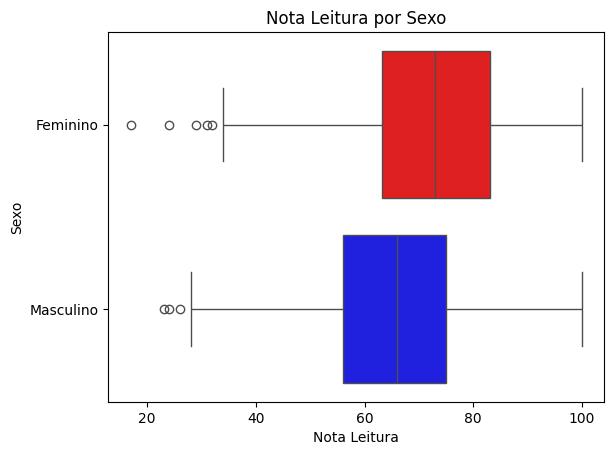

In [ ]:
ax = sns.boxplot(data=df_novo,x='Nota Leitura',y='Sexo',palette=['red','blue'])
ax.set_title('Nota Leitura por Sexo')

In [ ]:
df_novo.groupby(by=['Sexo']).describe()['Nota Redacao'].reset_index()

,Sexo,count,mean,std,min,25%,50%,75%,max
0,Feminino,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,Masculino,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


Text(0.5, 1.0, 'Nota Redação por Sexo')

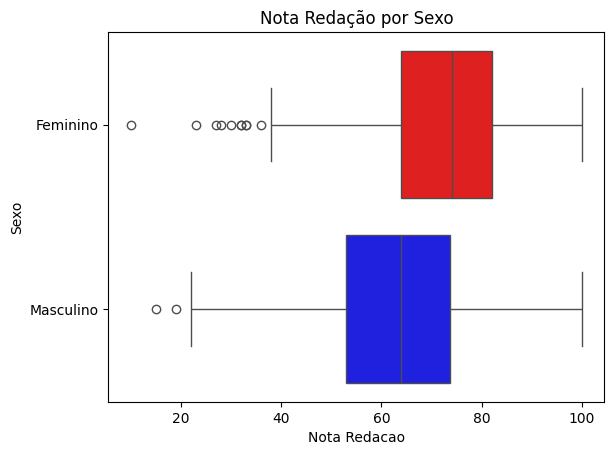

In [ ]:
ax = sns.boxplot(data=df_novo,x='Nota Redacao',y='Sexo',palette=['red','blue'])
ax.set_title('Nota Redação por Sexo')

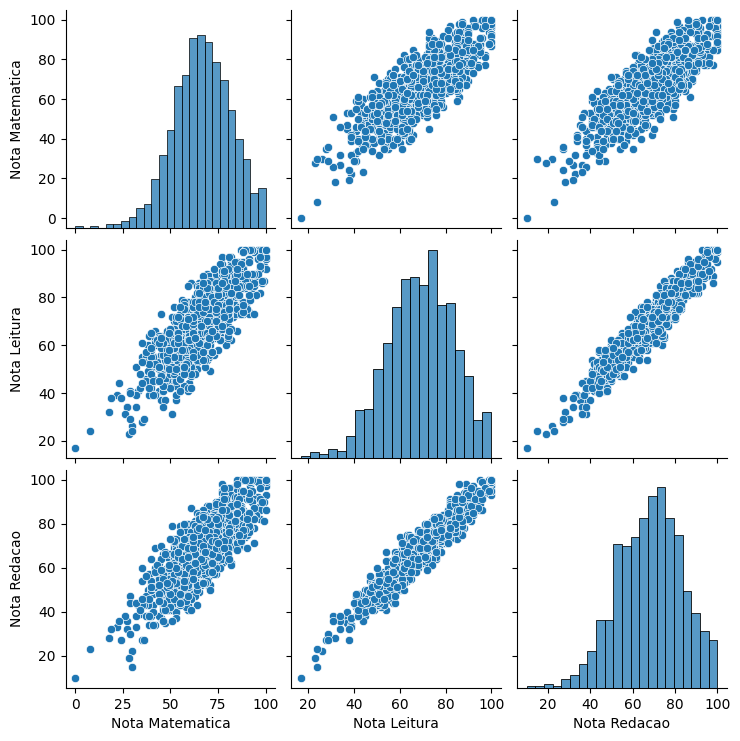

In [11]:
ax = sns.pairplot(df_novo)

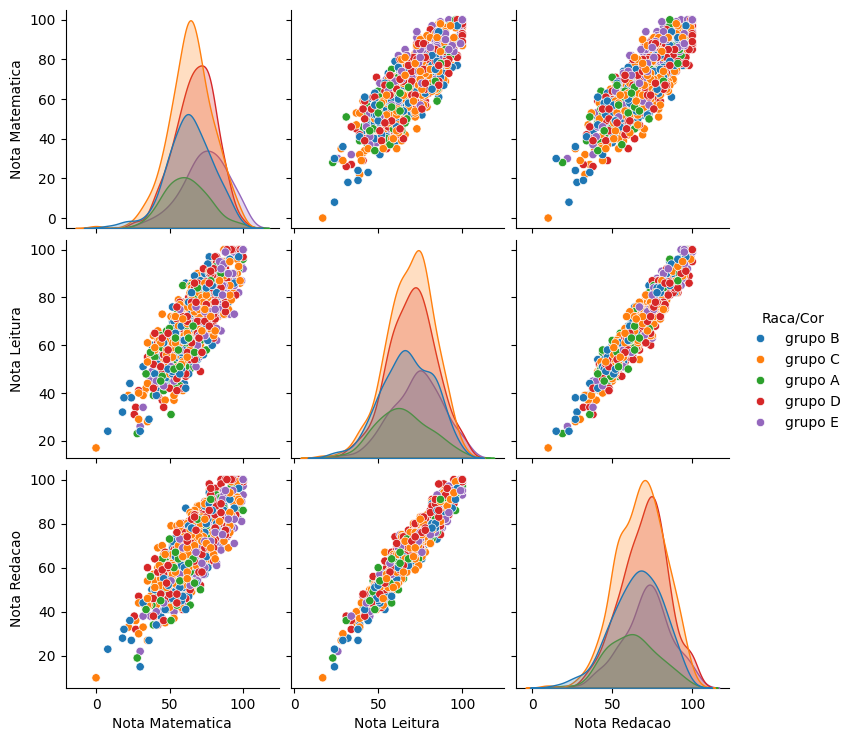

In [13]:
sns.pairplot(df_novo,hue='Raca/Cor')

Text(0.5, 1.0, 'Nota Matematica por Etnia')

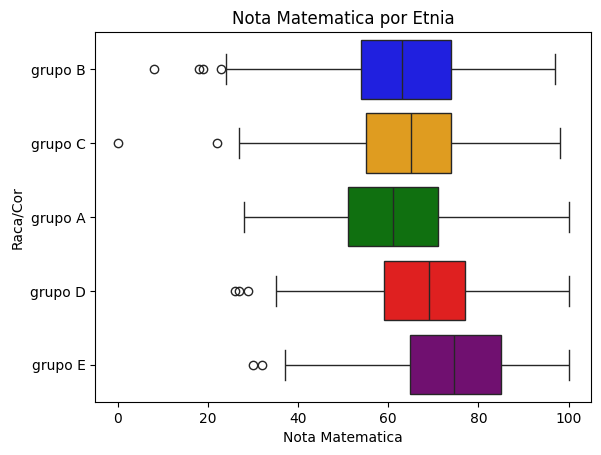

In [17]:
ax = sns.boxplot(data=df_novo,x='Nota Matematica', y='Raca/Cor',palette=['blue','orange','green','red','purple'])
ax.set_title('Nota Matematica por Etnia')

Text(0.5, 1.0, 'Nota Matematica por Etnia')

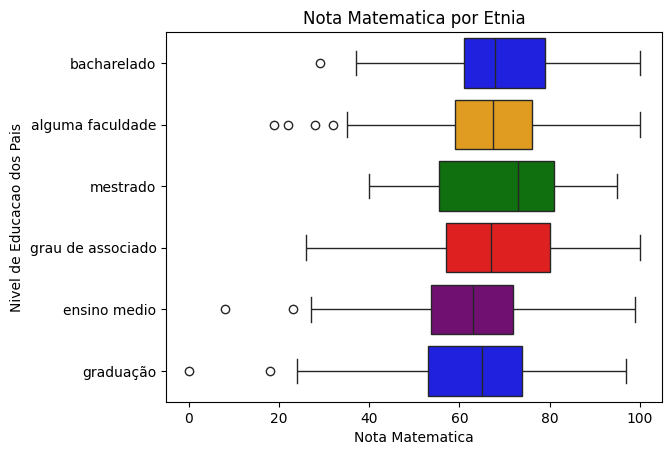

In [20]:
ax = sns.boxplot(data=df_novo,x='Nota Matematica', y='Nivel de Educacao dos Pais',palette=['blue','orange','green','red','purple'])
ax.set_title('Nota Matematica por Etnia')